# Some dual tilings

In [1]:
%matplotlib inline
import matplotlib.pyplot as pyplot
import numpy as np
import geopandas as gpd
import pandas as pd

from tile_map import Tiling
from tile_units import TileUnit

ak = gpd.read_file("../data/imd-auckland-2018.gpkg")

## Exploring for now

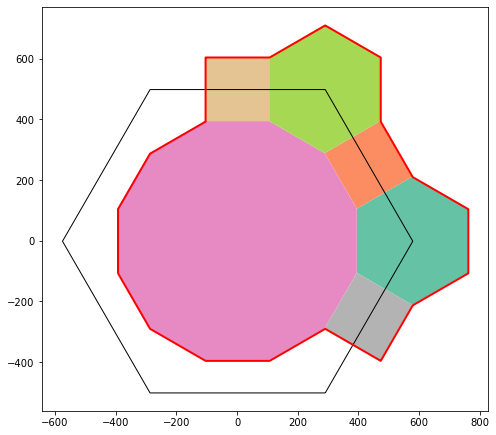

In [2]:
unit = TileUnit(tiling_type = "archimedean", code = "4.6.12", crs = ak.crs)
unit.plot()